# Social Media Virality Prediction using K-Means

## Introduction

Artificial intelligence is commonly used in various trade circles to automate processes, gather insights on business, and speed up processes. You will use Python to study the usage of artificial intelligence in real-life scenarios - how AI actually impacts industries. 

Social media is part and parcel of everyone's life nowadays. Artificial intelligence can be effectively used to analyze the trends in social media. 

In this notebook, we will focus on how to use a K-Means model to predict the virality of social media posts.

## Context

We will be working with the dataset of articles published by Mashable (a popular social article sharing platform) that is uploaded at [UCI](http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). We will divide the set of articles into clusters using a K-Means model such that articles within a cluster would have a chance of similar popularity.


### Side note: What is K-Means?

K-Means is a simple algorithm that divides a dataset into groups such that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

![Example](https://miro.medium.com/max/700/1*vNng_oOsNRHKrlh3pjSAyA.png)


## Use Python to open csv files

We will use the [scikit-learn](https://scikit-learn.org/stable/) and [pandas](https://pandas.pydata.org/) to work with our dataset. Scikit-learn is a very useful machine learning library that provides efficient tools for predictive data analysis.  Pandas is a popular Python library for data science. It offers powerful and flexible data structures to make data manipulation and analysis easier.


## Import Libraries


In [1]:
import pandas as pd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set("talk","darkgrid",font_scale=1,font="sans-serif",color_codes=True)
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importing the Dataset

The dataset contains a set of Mashable articles. Let us visualize the dataset.



In [2]:
#Importing the dataset
df = pd.read_csv('OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
#We are dropping the url column since it has only strings and won't help us in clustering
X = df.drop('url',axis=1)

## TASK 1: Drop the timedelta column from dataset X and store the result in X

In [4]:
X= X.drop(' timedelta',axis=1)

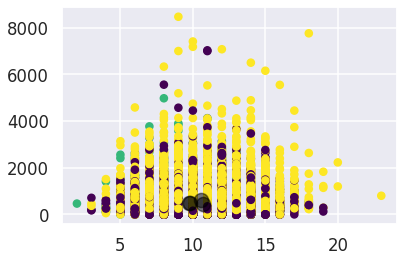

In [5]:
#K-Means algorithm can be called by KMeans function. We pass the number of clusters as an argument
kmeans = KMeans(n_clusters=4)
#let us fit the kmeans model by kmeans.fit function
kmeans_output = kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


The above clustering is definitely not good as we can clearly see that the clusters are not separated from each other.

We will try a smaller dataset now.

### Smaller dataset

The smaller dataset is created by taking the first 2 columns of X: n_tokens_title and n_tokens_content.	

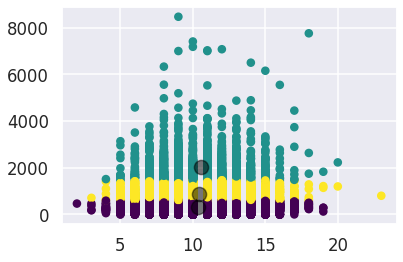

In [6]:
X1 = X.iloc[:, 0:2]
kmeans = KMeans(n_clusters=3)
kmeans_output = kmeans.fit(X1)
y_kmeans = kmeans.predict(X1)
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Here we can see that the clusters are clearly separated. The output of the kmeans algorithm is really good here. The articles in a single cluster would have similar potential of being viral.


## Task 2: Select the first ten columns of X and store the result in variable X2

In [7]:
X2 = X.iloc[:, 0:10]


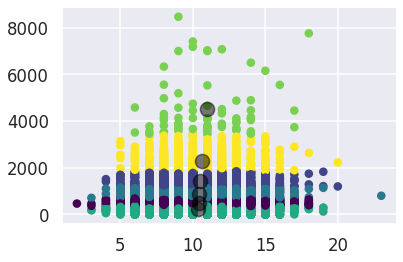

In [8]:
#Now, let us apply K-Means algorithm on X2 with 6 clusters
kmeans = KMeans(n_clusters=6)
kmeans_output = kmeans.fit(X2)
y_kmeans = kmeans.predict(X2)
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [9]:
#Let us take a subset of dataset X, called X3
X3 = X.iloc[:, 5:13]


## Task 3: Apply K-Means on dataset X3 with 10 clusters and visualise the data

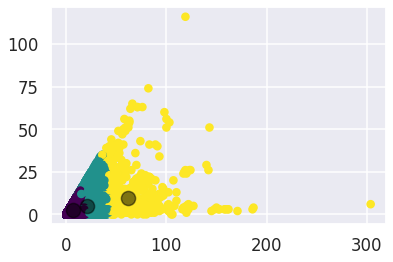

In [10]:
kmeans = KMeans(n_clusters=3)
kmeans_output = kmeans.fit(X3)
y_kmeans = kmeans.predict(X3)
plt.scatter(X3.iloc[:, 0], X3.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);